In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ranksums, mannwhitneyu, wilcoxon

#### create dataframe from .csv file

In [3]:
df = pd.read_csv('datasets/inclass_ex_wk_5.csv', skiprows=1, header=None, sep='\t',names=['WGT','GRO','REG',
                                                                                             'KILN', 'WT1', 'WT2',
                                                                                             'VEL1','VEL2'])

#### Description of column abbrevs
WGT = Tire wear (thous mi) by weight method

GRO = Tire wear by groove method

REG = Corn yield (lbs/acre) from regular seed

KILN = Corn yield from kiln-dried seed

WT1 = Minutes between eruptions 8/1 to 8/1, 1985

WT2 = Minutes between eruptions, 8/6 to 8/10, 1985

VEL1 = Michelson's determinations of speed of light (+299 thous km/sec), 1879

VEL2 = Michelson's determinations of speed of light, 1882

In [37]:
df

,WGT,GRO,REG,KILN,WT1,WT2,VEL1,VEL2
0,45.9,35.7,1903,2009,80,56,850,883
1,41.9,39.2,1935,1915,71,89,740,816
2,37.5,31.1,1910,2011,57,51,900,778
3,33.4,28.1,2496,2463,80,79,1070,796
4,31.0,24.0,2108,2180,75,58,930,682
5,30.5,28.7,1961,1925,77,82,850,711
6,30.9,25.9,2060,2122,60,52,950,611
7,31.9,23.3,1444,1482,86,88,980,599
8,30.4,23.1,1612,1542,77,52,980,1051
9,27.3,23.7,1316,1443,56,78,880,781


#### seperate groups into own dataframes

In [5]:
tire_wear = pd.DataFrame({'WGT':df['WGT'], 'GRO':df['GRO']})
corn = pd.DataFrame({'REG':df['REG'], 'KILN':df['KILN']})
erupt = pd.DataFrame({'WT1':df['WT1'], 'WT2': df['WT2']})
light = pd.DataFrame({'VEL1':df['VEL1'], 'VEL2': df['VEL2']})

#### set type and remove NaN
set condition of datframe to everything that DOES NOT equal '*'. Cast dataframe to float 64 type and drop NaN values if any.

In [6]:
# drop NaN or asterik values 
t = tire_wear[tire_wear!='*'].dropna().astype('float64')
c = corn[corn!='*'].dropna().astype('float64')
e = erupt[erupt!= '*'].dropna().astype('float64')
l = light[light!='*'].dropna().astype('float64')

/Users/MasonBaran/ML_programs/venv/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


#### quick histogram view to visually inspect correlation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122ba3518>,
      dtype=object)

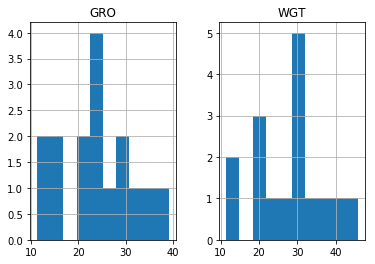

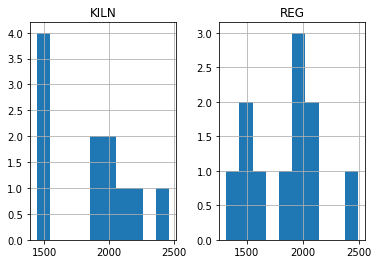

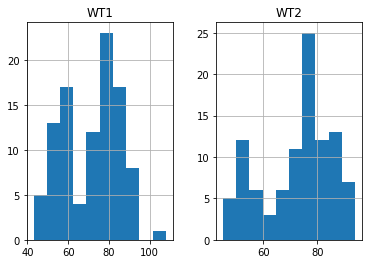

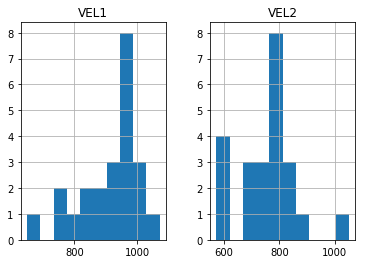

In [30]:
t.hist()
c.hist()
e.hist()
l.hist()

In [35]:
t.describe()

,WGT,GRO
count,16.000000,16.00000
mean,28.156250,23.60000
std,9.525542,7.94162
min,11.400000,11.20000
25%,20.775000,18.95000
50%,30.450000,23.50000
75%,32.275000,28.25000
max,45.900000,39.20000


In [33]:
c.describe()

,REG,KILN
count,11.000000,11.000000
mean,1841.454545,1875.181818
std,342.737323,332.850062
min,1316.000000,1443.000000
25%,1561.500000,1538.500000
50%,1910.000000,1925.000000
75%,2010.500000,2066.500000
max,2496.000000,2463.000000


In [34]:
e.describe()

,WT1,WT2
count,100.000000,100.000000
mean,71.620000,72.760000
std,14.152688,13.170306
min,43.000000,45.000000
25%,58.750000,63.250000
50%,75.000000,76.000000
75%,82.000000,81.250000
max,108.000000,94.000000


In [36]:
l.describe()

,VEL1,VEL2
count,23.000000,23.000000
mean,914.782609,756.217391
std,98.759099,107.114619
min,650.000000,573.000000
25%,865.000000,703.500000
50%,950.000000,774.000000
75%,980.000000,803.000000
max,1070.000000,1051.000000


#### Paired Tests (tire wear and corn yields) 
Wilcoxon Rank Sum Test using scipy

In [24]:
wilcoxon(t['WGT'], t['GRO'])

WilcoxonResult(statistic=2.0, pvalue=0.0006430412466952321)

In [29]:
wilcoxon(c['KILN'], c['REG'])

WilcoxonResult(statistic=15.0, pvalue=0.1095109374886408)

#### Independent values test (eruptions and speed of light)

In [42]:
mannwhitneyu(e['WT1'], e['WT2'], alternative='two-sided')

MannwhitneyuResult(statistic=4870.0, pvalue=0.7515729506390151)

In [43]:
mannwhitneyu(l['VEL1'], l['VEL2'], alternative='less')

MannwhitneyuResult(statistic=454.0, pvalue=0.9999852296767691)